### 🐶🐱 Dataset Overview: Cats vs Dogs (Kaggle)

In this practice, we'll be working with the **Cats vs Dogs** dataset — one of the most popular image classification datasets on [Kaggle](https://www.kaggle.com/c/dogs-vs-cats).

This dataset contains labeled images of cats and dogs and is commonly used for binary classification tasks in deep learning. It's a great starting point for experimenting with convolutional neural networks (CNNs) and transfer learning.

In this practice, we’ll explore the Cats vs Dogs dataset and build a deep learning model to classify images into two categories: **cats** and **dogs**. The goal is to design a custom image classification pipeline using convolutional neural networks (CNNs).

We'll start by importing the required libraries for data handling, model building, and training.

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copy, move
from glob import glob as g
from tqdm.notebook import tqdm

Next, we need to download the required dataset from its original source.
The **wget** command is used to download files from a URL, and the **unzip** command is used to extract the contents of a zip file.

In [ ]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/content/cats-and-dogs.zip"

--2025-04-17 11:06:30--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.207.53.2, 2600:1408:9000:38d::317f, 2600:1408:9000:382::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.207.53.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/content/cats-and-dogs.zip’

/content/cats-and-d 100%[===================>] 786.67M  54.6MB/s    in 14s     

2025-04-17 11:06:44 (58.2 MB/s) - ‘/content/cats-and-dogs.zip’ saved [824887076/824887076]



In [ ]:
!unzip -xq '/content/cats-and-dogs.zip' #Linux Command

count = 0
for name in tqdm(g('/content/PetImages/*/*')):

  if not os.path.getsize(name):
    count += 1
    os.remove(name)
print(count, ' empty files removed')

  0%|          | 0/25002 [00:00<?, ?it/s]

2  empty files removed


When we click the file icon on the left panel of your notebook (in Google Colab), we can access all the files that are currently stored in Colab's virtual environment. This is useful to browse datasets we've uploaded or extracted.

If we look inside the **PetImages** folder, we'll see that it contains two subfolders — one for cat images and one for dog images.

The os library is used for interacting with the file system — such as accessing, listing, or modifying files and directories.
For example, using os.listdir(path_address) will return a list of all file names in the specified path.

As an example, we can list some of the file names inside the **Cat** folder using os.listdir(), and also print out how many files are in there using **len().**

In [ ]:
cats = os.listdir('/content/PetImages/Cat')
print(len(cats))
print(cats[:5])

12500
['11690.jpg', '4661.jpg', '6100.jpg', '1516.jpg', '10905.jpg']


We’ll do the same thing for the **Dog** folder as well.

In [ ]:
dogs = os.listdir('/content/PetImages/Dog')
print(len(dogs))
print(dogs[:5])

12500
['11690.jpg', '4661.jpg', '6100.jpg', '1516.jpg', '10905.jpg']


Earlier, we imported the glob function, which is used to search for files based on a pattern.
To make it easier to use, we gave it a shorter alias and just called it g. So instead of writing glob(...) every time, we can simply write g(...).
```python
from glob import glob as g
```
Now let’s take a look at what this function actually does.

In [ ]:
g('/content/PetImages/Cat/*jpg')

As we saw earlier, the function returns all the files in the **Cat** folder that have a **.jpg** extension. It also gives us the full path to each of those files.

So, what's its difference with **os.listdir**?
While os.listdir() simply returns all file and folder names in a given directory, glob() (or its alias g) allows you to search for files using patterns — for example, all .jpg files. Unlike os.listdir(), glob() returns the full file paths and lets you filter by file extension or naming patterns directly, making it more convenient for tasks like loading specific types of images.

As you know, we need both training data and testing data. However, in this dataset, they haven’t been separated for us — so it’s our responsibility to do that.
What should we do then? We need to manually split the data into training and testing sets ourselves.

In the main directory of Colab — the one that contains the **PetImages** and **sample_data** folders — we want to create a new folder called **cats-v-dogs.** Inside this folder, we’ll create two more folders named **training** and **testing**, and inside each of those, we’ll create two additional folders named **cats** and **dogs**.

In [ ]:
train_cats_dir = '/content/cats-v-dogs/training/cats'
train_dogs_dir = '/content/cats-v-dogs/training/dogs'
test_cats_dir = '/content/cats-v-dogs/testing/cats'
test_dogs_dir = '/content/cats-v-dogs/testing/dogs'
directories = [
            train_cats_dir,
            train_dogs_dir,
            test_cats_dir,
            test_dogs_dir
]

for directory in directories:
  os.makedirs(directory, exist_ok=True)

Now that the required folders have been created — though they’re currently empty — we’re going to split the data into training and testing sets.
To do this, we’ll use the **train_test_split** function. We want to allocate 10% of the data for testing.

First, we’ll use the **g** function to get the full paths of all the cat and dog images.

In [ ]:
all_cats = sorted(g('/content/PetImages/Cat/*.jpg'))
all_dogs = sorted(g('/content/PetImages/Dog/*.jpg'))

Next, we use the **train_test_split** function with the specified parameters to split the cat images into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
cats_train, cats_test = train_test_split(
    all_cats,
    test_size = 0.1,
    random_state = 101,
    shuffle = True
    )

In [ ]:
dogs_train, dogs_test = train_test_split(
    all_dogs,
    test_size = 0.1,
    random_state = 101,
    shuffle = True
    )

Now, we need to move the files from each of the four lists —
cats_train, cats_test, dogs_test, and dogs_train — into their corresponding folders.

In [ ]:
def copy_images(image_list, target_dir):
    for name in tqdm(image_list):
        dest = os.path.join(target_dir, os.path.basename(name))
        copy(name, dest)

The manual way to implement the above function is:
```python
for name in tqdm(dogs_train):
  copy(name , os.path.join(train_dogs_dir , name.split('/')[-1]))
for name in tqdm(cats_train):
  copy(name , os.path.join(train_cats_dir , name.split('/')[-1]))

for name in tqdm(dogs_test):
  copy(name , os.path.join(test_dogs_dir , name.split('/')[-1]))
for name in tqdm(cats_test):
  copy(name , os.path.join(test_cats_dir , name.split('/')[-1]))
```

In [ ]:
copy_images(dogs_train, train_dogs_dir)
copy_images(cats_train, train_cats_dir)
copy_images(dogs_test, test_dogs_dir)
copy_images(cats_test, test_cats_dir)

  0%|          | 0/11249 [00:00<?, ?it/s]

  0%|          | 0/11249 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

In [ ]:
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

11249
11249
1250
1250


Now we need to create a data generator that will rescale our data.

Then we create a training generator and specify that our data is in binary format.

We do the same thing for the test data as well.

In [ ]:
image_size = (160, 160)

In [ ]:
TRAINING_DIR = '/content/cats-v-dogs/training'
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=image_size
)

Found 22498 images belonging to 2 classes.


In [ ]:
VALIDATION_DIR = '/content/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=image_size
)

Found 2500 images belonging to 2 classes.


Now let’s build our model 😎

For this, we’ll use transfer learning, specifically with the MobileNetV2 and ResNet50 architectures.

## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
resnet_base = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
resnet_base.trainable = False

In [ ]:
last_output = resnet_base.output

In [ ]:
x = GlobalAveragePooling2D()(last_output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(0.5)(x)
final_output = Dense(1, activation='sigmoid')(x)

In [ ]:
# Create the full model
model_resnet = Model(inputs=resnet_base.input, outputs=final_output)

In [ ]:
# Compile the model
model_resnet.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model_resnet.summary()

In [ ]:
history_resnet = model_resnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # You can increase this later
)

Epoch 1/10
190/352 ━━━━━━━━━━━━━━━━━━━━ 2:19 864ms/step - accuracy: 0.5457 - loss: 0.6864

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.5512 - loss: 0.6848

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


352/352 ━━━━━━━━━━━━━━━━━━━━ 329s 903ms/step - accuracy: 0.5512 - loss: 0.6848 - val_accuracy: 0.5604 - val_loss: 0.6740
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 308s 874ms/step - accuracy: 0.5719 - loss: 0.6774 - val_accuracy: 0.6208 - val_loss: 0.6636
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 325s 883ms/step - accuracy: 0.5716 - loss: 0.6764 - val_accuracy: 0.6260 - val_loss: 0.6557
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 309s 878ms/step - accuracy: 0.5854 - loss: 0.6731 - val_accuracy: 0.6244 - val_loss: 0.6541
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 308s 876ms/step - accuracy: 0.5882 - loss: 0.6723 - val_accuracy: 0.6104 - val_loss: 0.6561
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 321s 874ms/step - accuracy: 0.5861 - loss: 0.6727 - val_accuracy: 0.6232 - val_loss: 0.6524
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 307s 873ms/step - accuracy: 0.5885 - loss: 0.6686 - val_accuracy: 0.6160 - val_loss: 0.6529
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 307s 872ms/step - accuracy: 0.5921 - loss: 0.66

## MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
mobilenet_base = MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet'
)

In [ ]:
mobilenet_base.trainable = False

In [ ]:
last_output = mobilenet_base.output

In [ ]:
x = GlobalAveragePooling2D()(last_output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(0.5)(x)
final_output = Dense(1, activation='sigmoid')(x)

In [ ]:
# Create the full model
model_mobilenet = Model(inputs=mobilenet_base.input, outputs=final_output)

In [ ]:
# Compile the model
model_mobilenet.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history_mobilenet = model_mobilenet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # You can increase this later
)

Epoch 1/10
138/352 ━━━━━━━━━━━━━━━━━━━━ 1:35 447ms/step - accuracy: 0.8794 - loss: 0.2767

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


352/352 ━━━━━━━━━━━━━━━━━━━━ 183s 486ms/step - accuracy: 0.9062 - loss: 0.2179 - val_accuracy: 0.9740 - val_loss: 0.0656
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 163s 464ms/step - accuracy: 0.9429 - loss: 0.1377 - val_accuracy: 0.9732 - val_loss: 0.0661
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 160s 453ms/step - accuracy: 0.9431 - loss: 0.1349 - val_accuracy: 0.9732 - val_loss: 0.0664
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 161s 458ms/step - accuracy: 0.9512 - loss: 0.1195 - val_accuracy: 0.9748 - val_loss: 0.0612
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 201s 457ms/step - accuracy: 0.9503 - loss: 0.1195 - val_accuracy: 0.9756 - val_loss: 0.0600
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 163s 464ms/step - accuracy: 0.9535 - loss: 0.1149 - val_accuracy: 0.9744 - val_loss: 0.0613
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 162s 459ms/step - accuracy: 0.9566 - loss: 0.1071 - val_accuracy: 0.9748 - val_loss: 0.0608
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 161s 459ms/step - accuracy: 0.9534 - loss: 0.11

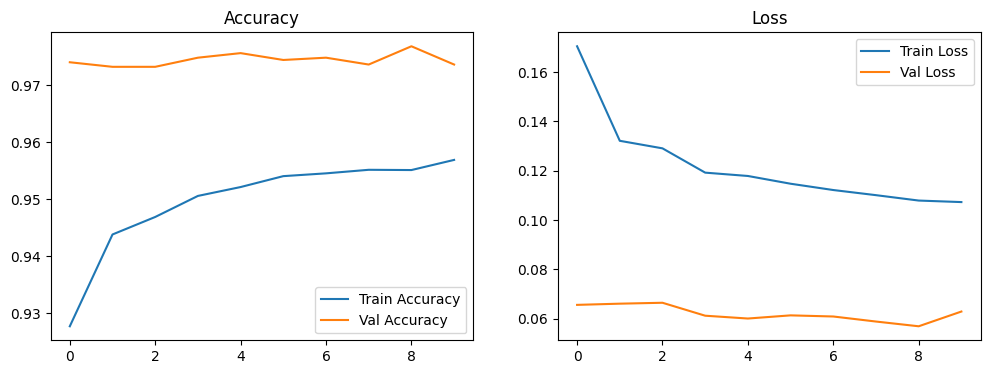

In [ ]:
import matplotlib.pyplot as plt

acc = history_mobilenet.history['accuracy']
val_acc = history_mobilenet.history['val_accuracy']
loss = history_mobilenet.history['loss']
val_loss = history_mobilenet.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.
    classes = model_mobilenet.predict(x, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

Saving cat.jpg to cat (3).jpg
Saving cat2.jpg to cat2.jpg
Saving dog.jpg to dog (1).jpg
Saving dog2.jpg to dog2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[5.3621818e-05]
cat (3).jpg is a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[3.877324e-05]
cat2.jpg is a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[0.99999666]
dog (1).jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0.99999964]
dog2.jpg is a dog
